In [36]:
#STEP ONE : IMPORTS

In [37]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, TimeDistributed, RepeatVector, InputLayer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import plot_model


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.utils import to_categorical



In [38]:
#STEP 2 : FILE READING AND DATA COLLECTION.

In [39]:
english_french = pd.read_csv('C:/Users/user/Desktop/AI and Data Science Workshop/MyNLPModel/data/eng_-french.csv')
english_french = english_french.sample(4000)
english_french.head()

,English words/sentences,French words/sentences
132431,Could you drop me off at the library?,Peux-tu me déposer à la bibliothèque ?
108440,I am accustomed to working hard.,Je suis habitué à travailler dur.
160216,Your feet will lead you to where your heart is.,Vos pieds vous conduiront là où votre cœur se ...
22974,Enjoy your evening.,Passez une bonne soirée !
147368,I want to be with you more than anything.,Je veux être avec vous plus que tout autre chose.


In [40]:
#STEP 3 : MAKING THE WORDS LOWERCASE

In [41]:
english_french['French words/sentences'] = english_french['French words/sentences'].str.lower()
english_french['English words/sentences'] = english_french['English words/sentences'].str.lower()

In [42]:
english_french.shape

(4000, 2)

In [43]:
#STEP 4 : TOKENIZING THE DATA

In [44]:
english_tokenizer = Tokenizer()
french_tokenizer = Tokenizer()

In [45]:
#STEP 5 : TOKENIZING THE DATA AND PRINTING OUT WORD INDEXES

In [46]:
english_tokenizer.fit_on_texts(english_french['English words/sentences'])
french_tokenizer.fit_on_texts(english_french['French words/sentences'])

english_word_index = english_tokenizer.word_index
french_word_index = french_tokenizer.word_index

print("English Word Index:", english_word_index)
print("French Word Index: ", french_word_index)

English Word Index: {'i': 1, 'you': 2, 'to': 3, 'the': 4, 'a': 5, 'is': 6, 'tom': 7, 'that': 8, 'he': 9, 'it': 10, 'this': 11, 'do': 12, 'me': 13, 'in': 14, "don't": 15, 'of': 16, 'have': 17, 'for': 18, 'was': 19, 'are': 20, 'your': 21, 'my': 22, 'what': 23, "i'm": 24, 'be': 25, 'we': 26, 'she': 27, 'not': 28, 'want': 29, 'like': 30, 'with': 31, 'know': 32, 'on': 33, 'at': 34, 'his': 35, 'think': 36, "you're": 37, 'go': 38, 'can': 39, 'did': 40, 'they': 41, 'all': 42, 'how': 43, 'him': 44, 'and': 45, "it's": 46, 'about': 47, "can't": 48, 'why': 49, 'no': 50, 'get': 51, 'time': 52, 'here': 53, 'there': 54, "didn't": 55, 'had': 56, 'were': 57, 'as': 58, 'one': 59, 'has': 60, 'so': 61, 'very': 62, "that's": 63, 'her': 64, 'up': 65, 'good': 66, 'out': 67, 'will': 68, 'going': 69, 'just': 70, 'if': 71, 'please': 72, 'an': 73, 'come': 74, 'help': 75, 'when': 76, 'where': 77, 'from': 78, 'who': 79, 'would': 80, 'now': 81, "i'll": 82, 'really': 83, "we're": 84, "i've": 85, "i'd": 86, 'been': 8

In [47]:
#STEP 5 : CONVERTING SENTENCES TO SEQUENCES.

In [48]:
X = english_tokenizer.texts_to_sequences(english_french['English words/sentences'])
y = french_tokenizer.texts_to_sequences(english_french['French words/sentences'])
english_french.head()

,English words/sentences,French words/sentences
132431,could you drop me off at the library?,peux-tu me déposer à la bibliothèque ?
108440,i am accustomed to working hard.,je suis habitué à travailler dur.
160216,your feet will lead you to where your heart is.,vos pieds vous conduiront là où votre cœur se ...
22974,enjoy your evening.,passez une bonne soirée !
147368,i want to be with you more than anything.,je veux être avec vous plus que tout autre chose.


In [49]:
print("English sequences sample:", X[:5])
print("French sequences sample:", y[:5])

English sequences sample: [[93, 2, 756, 13, 155, 34, 4, 757], [1, 98, 1430, 3, 344, 206], [21, 1431, 68, 1432, 2, 3, 77, 21, 534, 6], [345, 21, 470], [1, 29, 3, 25, 31, 2, 99, 116, 106]]
French sequences sample: [[65, 10, 23, 1713, 6, 9, 1714], [1, 24, 1107, 6, 419, 467], [184, 832, 4, 1715, 77, 58, 59, 378, 48, 283], [1716, 18, 171, 833], [1, 41, 44, 37, 4, 35, 5, 34, 192, 74]]


In [50]:
max_eng_len = max(len(seq) for seq in X)
max_fr_len = max(len(seq) for seq in y)

In [51]:
#STEP 6 : PAD SEQUENCES.

In [52]:
X_padded = pad_sequences(X, maxlen=max_eng_len, padding='post')
y_padded = pad_sequences(y, maxlen=max_fr_len, padding='post')

# Print shapes
print("Max length of English sequences:", max_eng_len)
print("Max length of French sequences:", max_fr_len)
print("Shape of X_padded:", X_padded.shape)
print("Shape of y_padded:", y_padded.shape)

Max length of English sequences: 27
Max length of French sequences: 29
Shape of X_padded: (4000, 27)
Shape of y_padded: (4000, 29)


In [53]:
#STEP 12 : DEFINING THE PRE-PROCESS_INPUT FUNCTION

In [54]:
def preprocess_input(sentence, english_tokenizer, max_eng_len):
    tokens = sentence.lower().split()
    token_ids = [english_tokenizer.word_index.get(word, 0) for word in tokens]
    padded_token_ids = pad_sequences([token_ids], maxlen=max_eng_len, padding='post')
    return padded_token_ids

In [55]:
# Print shapes after padding
print("English padded shape:", X_padded.shape)
print("French padded shape:", y_padded.shape)

English padded shape: (4000, 27)
French padded shape: (4000, 29)


In [56]:
#STEP 10 : TRAINING THE MODEL

In [57]:
y_padded_categorical = to_categorical(y_padded, num_classes=len(french_tokenizer.word_index) + 1)

model = Sequential()
model.add(InputLayer(input_shape=(max_eng_len,)))
model.add(Embedding(input_dim=len(english_tokenizer.word_index) + 1, output_dim=128))
model.add(LSTM(128))
model.add(RepeatVector(max_fr_len))
model.add(LSTM(128, return_sequences=True))
model.add(TimeDistributed(Dense(len(french_tokenizer.word_index) + 1, activation='softmax')))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_padded, y_padded_categorical, batch_size=64, epochs=20, validation_split=0.2)



c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 375ms/step - accuracy: 0.7009 - loss: 5.9773 - val_accuracy: 0.7733 - val_loss: 1.9808
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 342ms/step - accuracy: 0.7727 - loss: 1.9286 - val_accuracy: 0.7733 - val_loss: 1.8112
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 519ms/step - accuracy: 0.7750 - loss: 1.7195 - val_accuracy: 0.7733 - val_loss: 1.6990
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 379ms/step - accuracy: 0.7689 - loss: 1.6895 - val_accuracy: 0.7797 - val_loss: 1.6732
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 373ms/step - accuracy: 0.7760 - loss: 1.6565 - val_accuracy: 0.7799 - val_loss: 1.6621
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 444ms/step - accuracy: 0.7736 - loss: 1.6494 - val_accuracy: 0.7799 - val_loss: 1.6530
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 430ms/step - accuracy: 0.7776 - loss: 1.6139 - val_accuracy: 0.7799 - val_loss: 1.6495
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 413ms/step - accuracy: 0.7768 - loss: 1.6129 - val_accu

In [ ]:
#STEP 13 : DEFINING THE DECODE_SEQUENCE FUNCTION

In [ ]:
def decode_sequence(prediction, tokenizer):
    translated_sentence = []
    
    for word_prob in prediction:
        word_id = np.argmax(word_prob)
        if word_id == 0:
            break
        translated_sentence.append(tokenizer.index_word[word_id])
    
    return ' '.join(translated_sentence)


In [ ]:
# STEP 14 : TRANSLATE USER INPUT

In [ ]:
def translate_user_input(user_input, model, english_tokenizer, french_tokenizer, max_eng_len, max_fr_len):
    # Tokenize and pad the input sequence
    input_seq = english_tokenizer.texts_to_sequences([user_input])
    input_seq = pad_sequences(input_seq, maxlen=max_eng_len, padding='post')

    # Predict the translation
    prediction = model.predict(input_seq)

    # Decode the prediction to get the translated sentence
    translated_sentence = decode_sequence(prediction[0], french_tokenizer)
    
    return translated_sentence

In [ ]:
#STEP 11 : CHECKING THE DATA

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 22, 128)        │       381,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 29, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 29, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 29, 4429)       │       571,341 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,648,617 (13.92 MB)

 Trainable params: 1,216,205 (4.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,432,412 (9.28 MB)

In [ ]:
model.layers

[<Embedding name=embedding, built=True>,
 <LSTM name=lstm, built=True>,
 <RepeatVector name=repeat_vector, built=True>,
 <LSTM name=lstm_1, built=True>,
 <TimeDistributed name=time_distributed, built=True>]

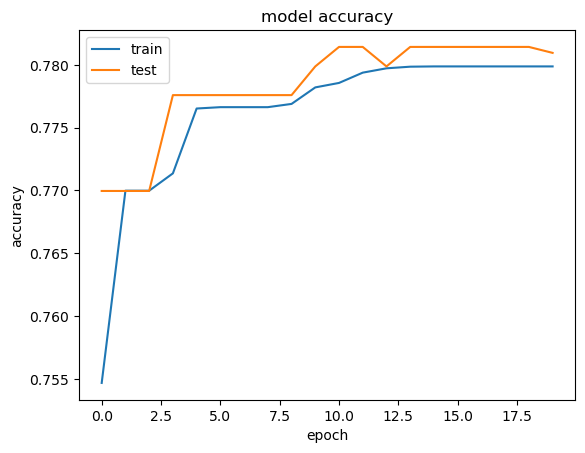

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

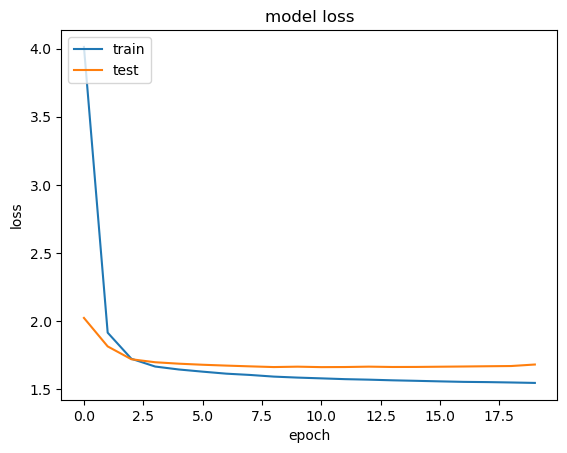

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#STEP 15 : RUNNING THE MODEL

In [ ]:
user_input = input("Enter an English sentence to translate: ")
translated_sentence = translate_user_input(user_input, model, english_tokenizer, french_tokenizer, max_eng_len, max_fr_len)
print(f"Translated to French: {translated_sentence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Translated to French: je ne que
